# Sara Oppenheim  

# PROJECT 1!  

### the goal is to analyze student test performance
pick any school in this dataset as an initial comparison point, pick a feature/measure/score to look at
compare your selection to schools in the entire dataset, schools in a particular borough, or schools in a particular district 
carry out one or more cleaning tasks
generate some descriptive statistics
generate one or more visualizations
include a brief conclusion statement (not more than two or three sentences)  


In [93]:
#Import the packages that I might need
import numpy as np
import pandas as pd
import scipy as sc
import sympy as sy
import matplotlib as matplot
import statistics as stat
import seaborn as sb

In [94]:
#Create a dataframe with the NYC Regents dataset. After 
df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv",index_col=0)

In [95]:
#Get some info about the data
#the column IDs
print("The column headers in the Regents df are:",df.columns)

The column headers in the Regents df are: Index(['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested',
       'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')


In [96]:
#Get some info about the data
#the row labels
print("The row labels in the Regents df are:",df.index)

The row labels in the Regents df are: Index(['01M034', '01M034', '01M034', '01M140', '01M140', '01M140', '01M140',
       '01M140', '01M184', '01M184',
       ...
       '84X717', '84X717', '84X717', '84X717', '84X717', '84X717', '84X717',
       '84X717', '84X717', '84X717'],
      dtype='object', name='School DBN', length=212331)


In [97]:
#Get some info about the data
#the number of rows, columns
print(df.shape)


(212331, 14)


In [98]:
#Get some info about the data
#see the first 4 rows of the df
df.head(4)

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na


In [99]:
#Get some info about the data
#see the last 4 rows of the df
df.tail(4)

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [100]:
#Get some info about the data
#basic statistics on numerical data in df (percentile, mean, stddev etc.)
#most of the columns are strings so they did not get summarized here. Thus this is not very useful for these data.
#print(df.describe())

In [101]:
#Is there missing data?
df.isnull().sum()

School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [102]:
#Although I see many missing ("na") values in "Number Scoring CR" and "Percent Scoring CR" only one column shows up as having null values. I think only the official "NaN" entries are being counted.
#In addition, there are many "s" values. Are these missing data?
#I examined the metadata for the dataset, obtained from https://data.cityofnewyork.us/Education/2014-15-To-2016-17-School-Level-NYC-Regents-Report/csps-2ne9
#Info about the s values: "rows with 5 or fewer students have been replaced with an "s". In addition, other rows have been replaced with an "s" when they could reveal, through addition or subtraction, the underlying numbers that have been redacted."

In [103]:
#I think the small sample size schools could be misleading, so I am removing all rows with "s"
#I am also removing rows with blank cells
print(df.shape)
df2 = df[~df["Mean Score"].str.contains('s')] #this removed ~80k rows
#df2.dropna(inplace = True)
print(df2.shape)
df2.dropna(inplace = True) #this returned a warning, but also reduced the dataset by 8 rows. So it worked? Or not?
print(df2.shape)

(212331, 14)
(137109, 14)
(137101, 14)


/Users/SaraO/miniconda3/envs/srmp/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [104]:
#Check again for missing data
print(df2.isnull().sum())
#now there are no "official" missing values
df2.head()

School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64


,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na


In [121]:
#now I will replace "na" values with "official" missing values (NaN) and then check missingness again
#also, I still see rows with s values so I'm also replacing s with NaN
#using the invert operator (the invert (~) operator acts like a not for boolean data)
#syntax: new_df = df[~df["col"].str.contains(word)]
df2 = df.replace({'na':'NaN','s':'NaN'})
print(df2.head())
print(df2.shape)
df2.dropna(inplace = True)
print(df2.shape)
print(df2.head())
df3 = df2[~df2["Mean Score"].str.contains('NaN')]
df4 = df3[~df3["Number Scoring CR"].str.contains('NaN')]
print(df4.head())

                               School Name School Level         Regents Exam  \
School DBN                                                                     
01M034      P.S. 034 Franklin D. Roosevelt          K-8  Common Core Algebra   
01M034      P.S. 034 Franklin D. Roosevelt          K-8   Living Environment   
01M034      P.S. 034 Franklin D. Roosevelt          K-8   Living Environment   
01M140              P.S. 140 Nathan Straus          K-8  Common Core Algebra   
01M140              P.S. 140 Nathan Straus          K-8  Common Core Algebra   

            Year  Total Tested Mean Score Number Scoring Below 65  \
School DBN                                                          
01M034      2017             4        NaN                     NaN   
01M034      2015            16       77.9                       1   
01M034      2016             9         74                       1   
01M140      2016             3        NaN                     NaN   
01M140      2017         

In [128]:
#now how much data is left?
df4.shape
df4.groupby(['School Name','School Level']).count()

,,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School Name,School Level,,,,,,,,,,,,
47 The American Sign Language and English Secondar,High school,107,107,107,107,107,107,107,107,107,107,107,107
A. Philip Randolph Campus High School,High school,187,187,187,187,187,187,187,187,187,187,187,187
ACORN Community High School,High school,101,101,101,101,101,101,101,101,101,101,101,101
Abraham Lincoln High School,High school,209,209,209,209,209,209,209,209,209,209,209,209
Abraham Lincoln Yabc,High school,64,64,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Women's Leadership School,Secondary School,124,124,124,124,124,124,124,124,124,124,124,124
Young Women's Leadership School of Brooklyn,Secondary School,102,102,102,102,102,102,102,102,102,102,102,102
Young Women's Leadership School of the Bronx,Secondary School,32,32,32,32,32,32,32,32,32,32,32,32


In [132]:
#I am going to limit my analysis to high schools
is_hs =  df4['School Level']=="High school"
print(is_hs.head())
HS = df4[is_hs]
HS.head(4)

School DBN
01M184    False
01M184    False
01M184    False
01M188    False
01M188    False
Name: School Level, dtype: bool


,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11,91.7,1,8.3,0,0,0,0
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9,25,50,25,50,3,6,15,30
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15,28.3,38,71.7,6,11.3,29,54.7
01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2016,6,48,6,100,0,0,0,0,0,0


In [133]:
#for high schools, how much data is there?
HS.shape

(51459, 14)

In [154]:
#for high schools, how much data is there for the different Regents subjects?
print(HS.groupby('School Name')['Regents Exam'].count().sort_values(ascending=False))
HS.head()

School Name
New Visions Charter High School for Advanced Math     457
New Visions Charter High School for the Humanities    359
Edward R. Murrow High School                          243
Francis Lewis High School                             235
John Bowne High School                                234
                                                     ... 
Gateway School for Environmental Research and Tech     11
Washington Irving High School                           8
South Bronx Community Charter School                    2
Legacy School for Integrated Studies                    1
International Arts Business School                      1
Name: Regents Exam, Length: 457, dtype: int64


,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11,91.7,1,8.3,0,0,0,0
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9,25,50,25,50,3,6,15,30
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15,28.3,38,71.7,6,11.3,29,54.7
01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2016,6,48,6,100,0,0,0,0,0,0
01M292,Orchard Collegiate Academy,High school,Common Core English,2015,34,61.5,15,44.1,19,55.9,9,26.5,11,32.4


In [178]:
#I'm going to compare two schools with large numbers of Regents exams. I'm comparing two "New Visions" charter schools: one is "for advanced math," the other is "for the humanities." Will their Regents scores reflect their specializations?
test=HS[HS['School Name'].str.contains('New Visions')]
print(test.groupby('Regents Exam')['School Name'].count().sort_values(ascending=False))

Regents Exam
Common Core Algebra      205
Common Core English      151
Common Core Geometry     143
Algebra2/Trigonometry     75
Integrated Algebra        63
English                   63
Common Core Algebra2      59
Geometry                  57
Name: School Name, dtype: int64


In [198]:
#Since Common Core Algebra and Common Core English have the largest sample sizes, these are the subjects I will compare
is_nvmath =  test['School Name']=="New Visions Charter High School for Advanced Math"
is_nvhum = test['School Name']=="New Visions Charter High School for the Humanities"
NVmath=test[is_nvmath]
NVhum=test[is_nvhum]
#recode mean score as a float
NVmath['Mean Score']=NVmath['Mean Score'].astype('float')
NVhum['Mean Score']=NVhum['Mean Score'].astype('float')
print(NVmath.dtypes)
print(NVhum.dtypes)


School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65         object
Percent Scoring Below 65        object
Number Scoring 65 or Above      object
Percent Scoring 65 or Above     object
Number Scoring 80 or Above      object
Percent Scoring 80 or Above     object
Number Scoring CR               object
Percent Scoring CR              object
dtype: object
School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65         object
Percent Scoring Below 65        object
Number Scoring 65 or Above      object
Percent Scoring 65 or Above     object
Number Scoring 80 or Above      object
Percent Sco

/Users/SaraO/miniconda3/envs/srmp/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/SaraO/miniconda3/envs/srmp/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [237]:
#Compare scores between schools
print("Regents scores at the New Visions Charter High School for Advanced Math:", NVmath.groupby(['Regents Exam'])['Mean Score'].mean())
print("Regents scores at the New Visions Charter High School for the Humanities:", NVhum.groupby(['Regents Exam'])['Mean Score'].mean())


Regents scores at the New Visions Charter High School for Advanced Math: Regents Exam
Algebra2/Trigonometry    49.390909
Common Core Algebra      65.391453
Common Core Algebra2     61.861111
Common Core English      70.101136
Common Core Geometry     58.445977
English                  68.185185
Geometry                 58.246667
Integrated Algebra       68.282143
Name: Mean Score, dtype: float64
Regents scores at the New Visions Charter High School for the Humanities: Regents Exam
Algebra2/Trigonometry    46.403226
Common Core Algebra      58.712500
Common Core Algebra2     54.773913
Common Core English      68.684127
Common Core Geometry     51.055357
English                  62.052778
Geometry                 60.066667
Integrated Algebra       65.554286
Name: Mean Score, dtype: float64


array([[<AxesSubplot:title={'center':'Algebra2/Trigonometry'}>,
        <AxesSubplot:title={'center':'Common Core Algebra'}>,
        <AxesSubplot:title={'center':'Common Core Algebra2'}>],
       [<AxesSubplot:title={'center':'Common Core English'}>,
        <AxesSubplot:title={'center':'Common Core Geometry'}>,
        <AxesSubplot:title={'center':'English'}>],
       [<AxesSubplot:title={'center':'Geometry'}>,
        <AxesSubplot:title={'center':'Integrated Algebra'}>,
        <AxesSubplot:>]], dtype=object)

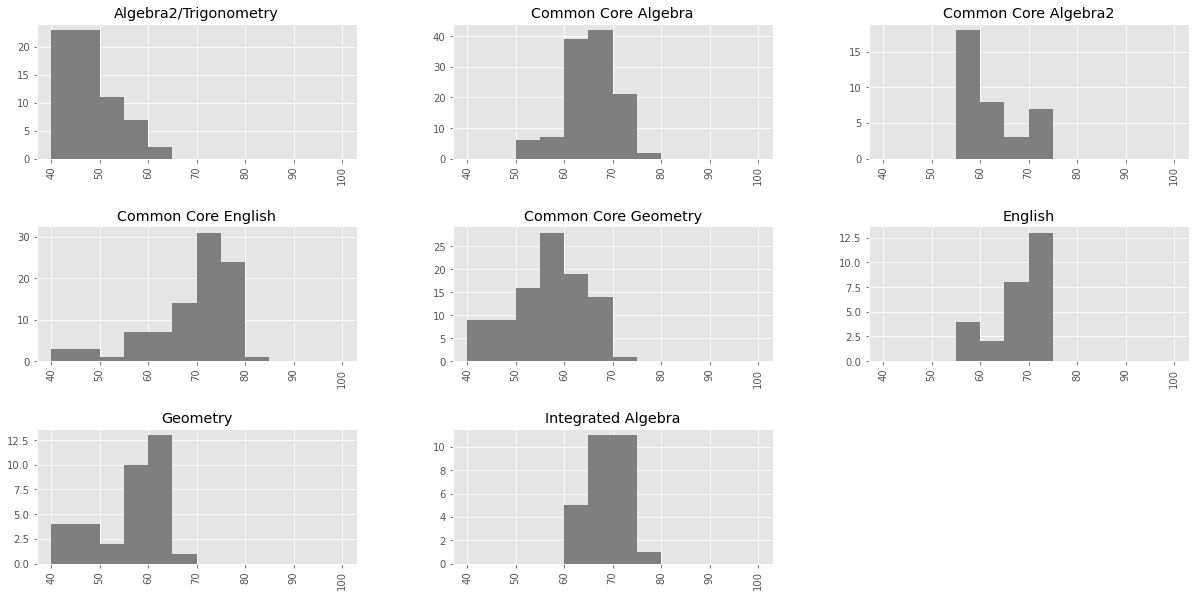

In [240]:
#Compare Common Core Algebra and Common Core English scores between schools
NVmath.hist(column='Mean Score', by='Regents Exam',grid=False,figsize=(20, 10),
        legend=False,bins=[40,50,55,60,65,70,75,80,85,90,95,100],color='tab:gray')

array([[<AxesSubplot:title={'center':'Algebra2/Trigonometry'}>,
        <AxesSubplot:title={'center':'Common Core Algebra'}>,
        <AxesSubplot:title={'center':'Common Core Algebra2'}>],
       [<AxesSubplot:title={'center':'Common Core English'}>,
        <AxesSubplot:title={'center':'Common Core Geometry'}>,
        <AxesSubplot:title={'center':'English'}>],
       [<AxesSubplot:title={'center':'Geometry'}>,
        <AxesSubplot:title={'center':'Integrated Algebra'}>,
        <AxesSubplot:>]], dtype=object)

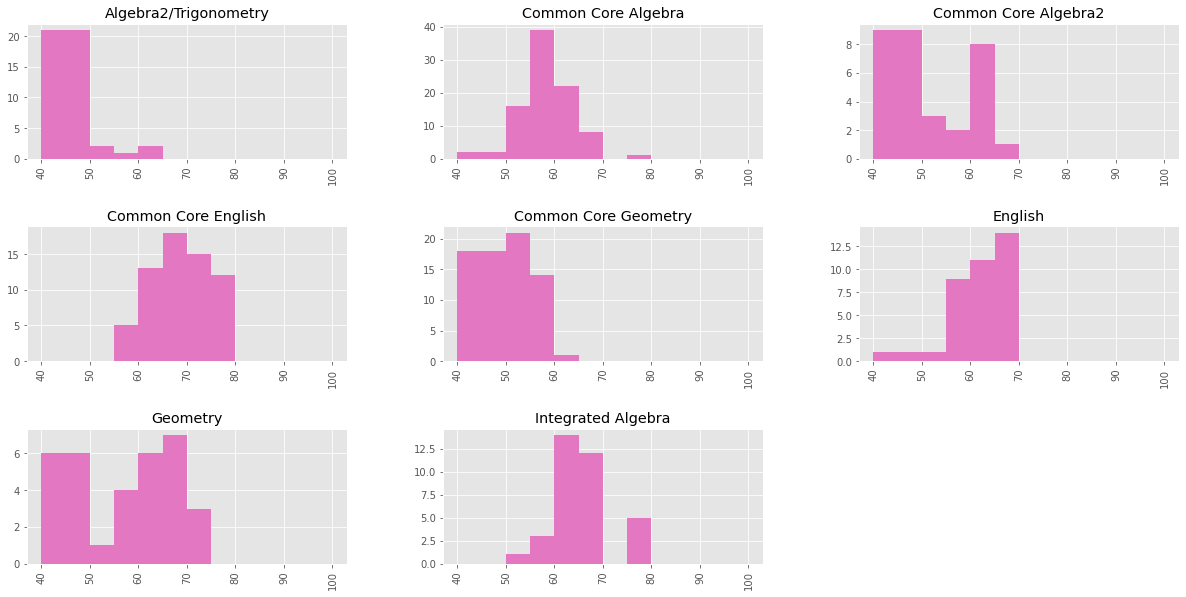

In [238]:
#Compare Common Core Algebra and Common Core English scores between schools
NVhum.hist(column='Mean Score', by='Regents Exam',grid=False,figsize=(20, 10),
        legend=False,bins=[40,50,55,60,65,70,75,80,85,90,95,100],color='tab:pink')

Conclusions: 
I compared two charter high schools in the same consortium, New Visions Charter High School. 
One targets humanities, the other math. 
I expected that Regents scores would reflect the different strengths of each school, 
but in fact the math-focused school had slightly better scores in all Regents subjects, 
including the humanities!